In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [2]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [3]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [4]:
diabetes.target[:3]

array([151.,  75., 141.])

In [5]:
import matplotlib.pyplot as plt

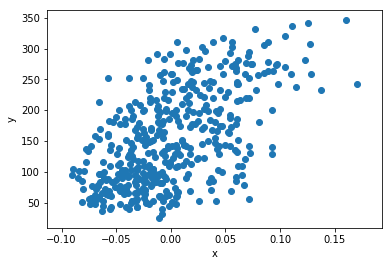

In [6]:
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
x = diabetes.data[:, 2]
y = diabetes.target

<퀴즈>

In [8]:
x_sample = x[99:109]
print(x_sample, x_sample.shape)

[-0.06440781  0.01750591 -0.04500719  0.02828403  0.04121778  0.06492964
 -0.03207344 -0.07626374  0.04984027  0.04552903] (10,)


In [9]:
import numpy as np
np.random.seed(42)

In [10]:
w = np.random.rand()
b = np.random.rand()
print(w, b)

0.3745401188473625 0.9507143064099162


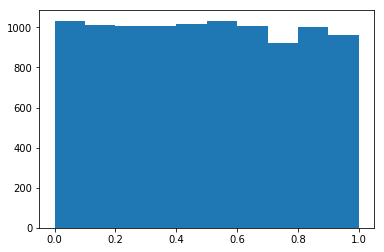

In [11]:
h = np.random.rand(10000)
plt.hist(h)
plt.show()

In [12]:
y_hat = w * x[0] + b
print(y_hat)

0.9738220109318572


In [13]:
print(y[0])

151.0


In [14]:
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
print(y_hat_inc)

0.979991631583726


In [15]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688804


In [16]:
w_new = w + w_rate
print(w_new)

0.4362363253660513


In [17]:
b_inc = b + 0.1
y_hat_inc = w * x[0] + b_inc
print(y_hat_inc)

1.0738220109318573


In [18]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


In [19]:
b_new = b + 1
print(b)

0.9507143064099162


오차를 이용한 업데이트

In [20]:
error = y[0] - y_hat
print(error)

150.02617798906815


In [21]:
w_new = w + w_rate * error
b_new = b + 1 * error
print(w_new, b_new)

9.630586179270475 150.97689229547805


2번째 반복

In [22]:
y_hat = w_new * x[1] + b_new
error = y[1] - y_hat
print(error)

-75.48116691272068


In [23]:
w_rate = x[1]
w_new = w_new + w_rate * error
b_new = b_new + 1 * error
print(w_new, b_new)

13.515908387312404 75.49572538275737


반복

In [24]:
for x_i, y_i in zip(x, y):
    error = y_i - (w * x_i + b)
    w_rate = x_i
    w = w + w_rate * error
    b = b + 1 * error
print(w, b)

587.641435903107 99.39286040226526


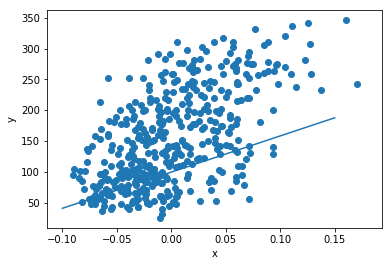

In [25]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

여러 에포크를 반복하기

In [26]:
for i in range(1, 100):
    for x_i, y_i in zip(x, y):
        error = y_i - (w * x_i + b)
        w = w + x_i * error
        b = b + 1 * error
print(w, b)

913.5973364345905 123.39414383177204


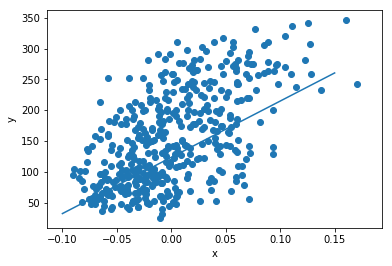

In [27]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [28]:
x_new = 0.18
y_pred = w * x_new + b
print(y_pred)

287.8416643899983


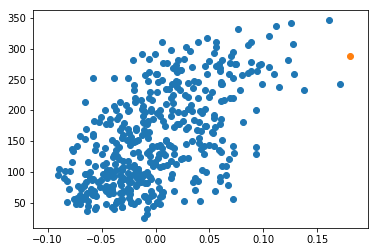

In [29]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.show()

Neuron 클래스

In [30]:
class Neuron:
    
    def __init__(self, w, b):
        self.w = w    # 가중치를 초기화합니다
        self.b = b    # 절편을 초기화합니다
    
    def forpass(self, x):
        y_hat = self.w * x + self.b    # 직선 방정식을 계산합니다
        return y_hat
    
    def backprop(self, x, err):
        w_grad = err * x    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = err * 1    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def fit(self, x, y, epochs):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                y_hat = self.forpass(x_i) # 정방향 계산
                error = y_i - y_hat       # 오차 계산
                w_grad, b_grad = self.backprop(x_i, error)  # 역방향 계산
                self.w += w_grad          # 가중치 업데이트
                self.b += b_grad          # 절편 업데이트

In [31]:
w = np.random.rand()
b = np.random.rand()
neuron = Neuron(w, b)
neuron.fit(x, y, 300)

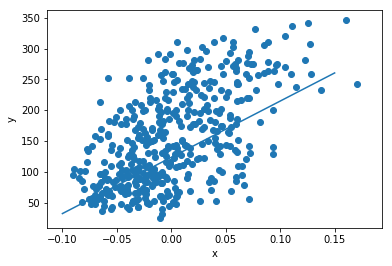

In [32]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()